<a href="https://colab.research.google.com/github/panos-sam/Data_Mining/blob/main/DataMiningProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Project 2
> Samlidis Panagiotis | 1115201500250

Here we mount our drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


We import all the necessary libraries for our needs.

In [ ]:
import pandas as pd
from pandas import DataFrame
import datetime
from datetime import datetime
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

We set a path in order to read a .csv file and make a dataframe with the given .csv

In [ ]:
path="/content/gdrive/MyDrive/DataMining/books_1.Best_Books_Ever.csv"

df=pd.read_csv(path, sep = ',')

## Προεπεξεργασία (10%)

Clear all the nan values from our dataframe

In [ ]:
df.dropna(inplace=True)

NameError: ignored

In [ ]:
df.isna().sum()

bookId              0
title               0
series              0
author              0
rating              0
description         0
language            0
isbn                0
genres              0
characters          0
bookFormat          0
edition             0
pages               0
publisher           0
publishDate         0
firstPublishDate    0
awards              0
numRatings          0
ratingsByStars      0
likedPercent        0
setting             0
coverImg            0
bbeScore            0
bbeVotes            0
price               0
dtype: int64

25 columns exist

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 1 to 52403
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            796 non-null    object 
 1   title             796 non-null    object 
 2   series            796 non-null    object 
 3   author            796 non-null    object 
 4   rating            796 non-null    float64
 5   description       796 non-null    object 
 6   language          796 non-null    object 
 7   isbn              796 non-null    object 
 8   genres            796 non-null    object 
 9   characters        796 non-null    object 
 10  bookFormat        796 non-null    object 
 11  edition           796 non-null    object 
 12  pages             796 non-null    object 
 13  publisher         796 non-null    object 
 14  publishDate       796 non-null    object 
 15  firstPublishDate  796 non-null    object 
 16  awards            796 non-null    object 


Divide the ratingstar column into 5 different columns.

In [ ]:
df[['ratingStar5', 'ratingStar4', 'ratingStar3', 'ratingStar2', 'ratingStar1']] = df['ratingsByStars'].str.strip('[]').str.split(',', expand=True, n=4)


We created 5 more columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 1 to 52403
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            796 non-null    object 
 1   title             796 non-null    object 
 2   series            796 non-null    object 
 3   author            796 non-null    object 
 4   rating            796 non-null    float64
 5   description       796 non-null    object 
 6   language          796 non-null    object 
 7   isbn              796 non-null    object 
 8   genres            796 non-null    object 
 9   characters        796 non-null    object 
 10  bookFormat        796 non-null    object 
 11  edition           796 non-null    object 
 12  pages             796 non-null    object 
 13  publisher         796 non-null    object 
 14  publishDate       796 non-null    object 
 15  firstPublishDate  796 non-null    object 
 16  awards            796 non-null    object 


Create a new column with only 1 genre based on column 'genres'

In [ ]:
df['genreSingle'] = df['genres'].str.strip('[').str.split(',').str[0]

Create a new column with the year published from the 'publishDate' column

In [ ]:
df['publishDate']

1                   09/28/04
8                   09/25/12
29                  09/30/04
37                  05/12/86
42                  03/01/06
                ...         
52135    September 13th 2016
52179    September 21st 2003
52232      November 6th 2012
52263    September 25th 2001
52403           October 2009
Name: publishDate, Length: 796, dtype: object

In [ ]:
df['publishDate'] = pd.to_datetime(df['publishDate'],errors='coerce')
df['publishDate'] = pd.to_datetime(df['publishDate'], format='%B %dth %Y',errors='coerce')

df['publishYear'] = df['publishDate'].dt.year

In [ ]:
df.isnull().sum()

bookId              0
title               0
series              0
author              0
rating              0
description         0
language            0
isbn                0
genres              0
characters          0
bookFormat          0
edition             0
pages               0
publisher           0
publishDate         2
firstPublishDate    0
awards              0
numRatings          0
ratingsByStars      0
likedPercent        0
setting             0
coverImg            0
bbeScore            0
bbeVotes            0
price               0
ratingStar5         0
ratingStar4         0
ratingStar3         0
ratingStar2         0
ratingStar1         0
genreSingle         0
publishYear         2
dtype: int64

In [ ]:
df.dropna(inplace=True)
df['publishYear'] = df['publishYear'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 1 to 52403
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   bookId            794 non-null    object        
 1   title             794 non-null    object        
 2   series            794 non-null    object        
 3   author            794 non-null    object        
 4   rating            794 non-null    float64       
 5   description       794 non-null    object        
 6   language          794 non-null    object        
 7   isbn              794 non-null    object        
 8   genres            794 non-null    object        
 9   characters        794 non-null    object        
 10  bookFormat        794 non-null    object        
 11  edition           794 non-null    object        
 12  pages             794 non-null    object        
 13  publisher         794 non-null    object        
 14  publishDate       794 no

## Ερωτήματα για μελέτη των δεδομένων - απαντήστε σε 5 από τα παρακάτω (20%)

### 1. Κατασκευάστε το ιστόγραμμα των ratings στο σύνολο δεδομένων (χρησιμοποιήστε την στήλη rating)

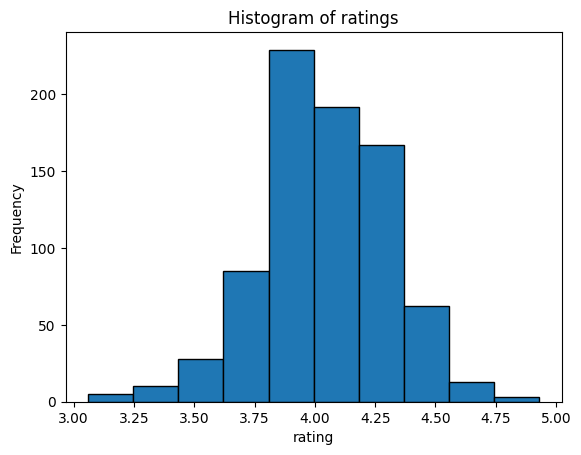

In [ ]:
df['rating']

# create a histogram of the 'rating' column
plt.hist(df['rating'],edgecolor= 'black')

# add labels and title to the histogram
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.title('Histogram of ratings')

# display the histogram
plt.show()

### 2. Ποιά είναι τα 10 βιβλία με τις περισσότερες σελίδες

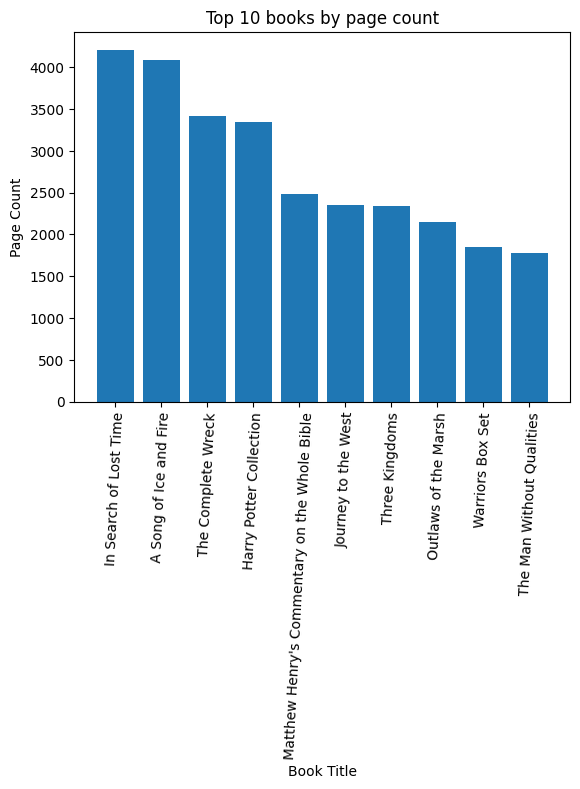

In [ ]:
df['pages'] = df['pages'].astype(int)

most_pages = df.nlargest(10,'pages')[['title','pages']]

fig , ax = plt.subplots()

x_labels = df.nlargest(10,'pages')['title']

y_values = df.nlargest(10,'pages')['pages']

ax.bar(x_labels,y_values)

ax.set_title('Top 10 books by page count')
ax.set_xlabel('Book Title')
ax.set_ylabel('Page Count')


plt.xticks(rotation=87)

# display the histogram
plt.show()

### 3. Ποιά είναι τα 10 βιβλία με τα περισσότερα 5-αστέρια (χρησιμοποιήστε μόνο τα βιβλία που έχουν λάβει πάνω από 10.000 5-star ratings από τη στήλη ratingStar5) .

In [ ]:
df['ratingStar5'] = df['ratingStar5'].str.replace("'", "").astype(float)

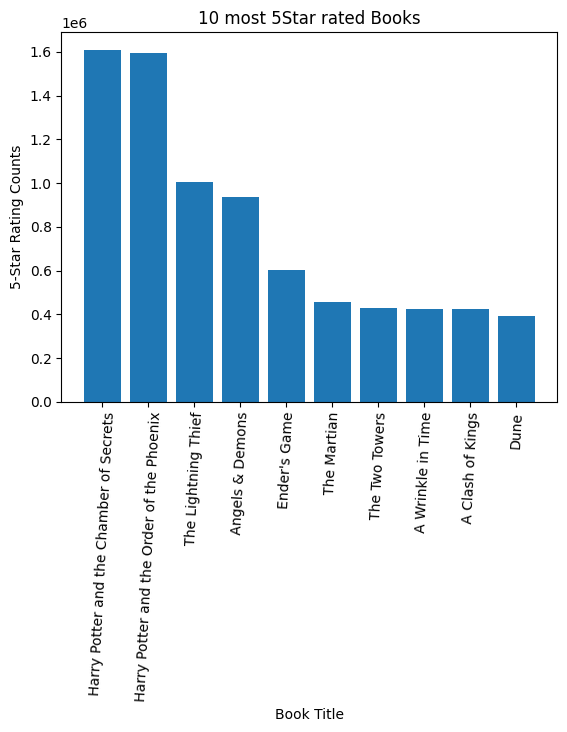

In [ ]:
most_5stars = df.nlargest(10,'ratingStar5')[['title','ratingStar5']]

fig, ax = plt.subplots()

x_labels = df.nlargest(10,'ratingStar5')['title']
y_values = df.nlargest(10,'ratingStar5')['ratingStar5']

ax.bar(x_labels,y_values)

ax.set_title('10 most 5Star rated Books')
ax.set_xlabel('Book Title')
ax.set_ylabel('5-Star Rating Counts')

plt.xticks(rotation=87)

plt.show()

### 5. Ποιοι είναι οι 10 συγγραφεις με τα περισσότερα βιβλία

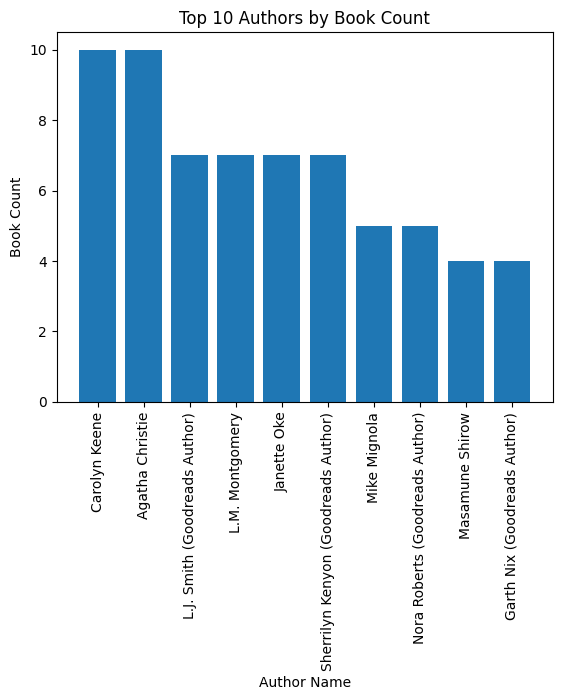

In [ ]:
# Get the top 10 author value counts
author_counts = df['author'].value_counts().head(10)

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a bar plot with the author names on the x-axis and the book counts on the y-axis
ax.bar(author_counts.index, author_counts.values)

# Set the title and axis labels
ax.set_title('Top 10 Authors by Book Count')
ax.set_xlabel('Author Name')
ax.set_ylabel('Book Count')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Show the plot
plt.show()

### 6. Ποιοι είναι οι 10 συγγραφείς με τις περισσότερες κριτικές (χρησιμοποιήστε την στήλη numRatings).

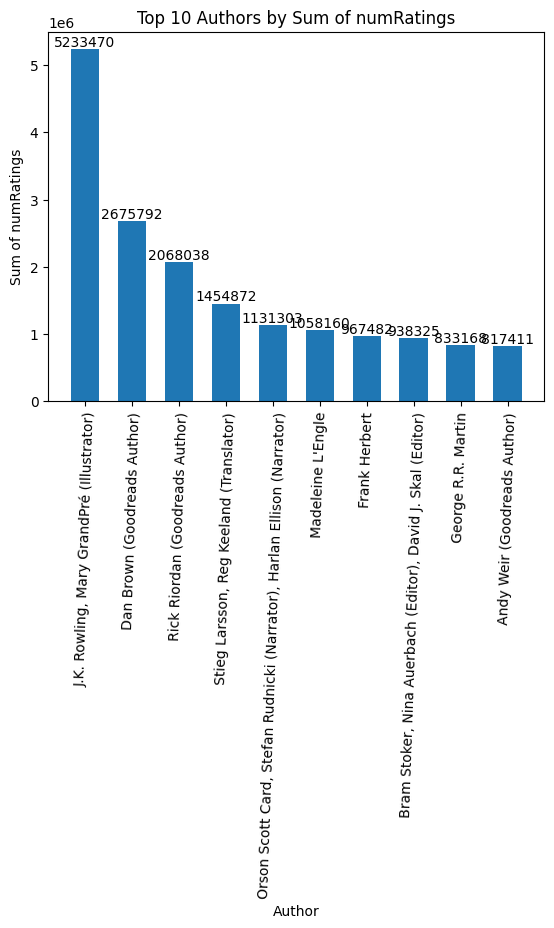

In [ ]:
top_authors = df.groupby('author')['numRatings'].sum().nlargest(10)

# create the bar plot
plt.bar(top_authors.index, top_authors.values,width=0.6)

# iterate over each bar and add the number on top of it
for i, v in enumerate(top_authors.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# set the plot title and labels
plt.title('Top 10 Authors by Sum of numRatings')
plt.xlabel('Author')
plt.ylabel('Sum of numRatings')

plt.xticks(rotation=88)

plt.show()

### 13. Πόσα βιβλία εκδίδονται ανά έτος ;

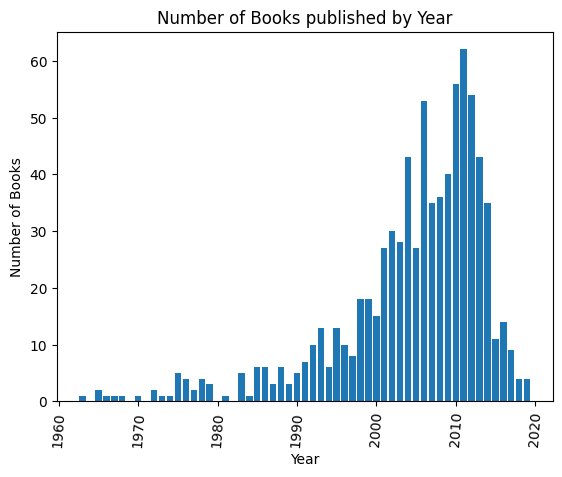

In [ ]:
year_sum = df['publishYear'].value_counts()

plt.bar(year_sum.index,year_sum.values)


plt.title('Number of Books published by Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')

plt.xticks(rotation=86)

plt.show()


##Υλοποίηση Recommendation system (35%)

Copy the 3 needed columns into our new dataframe

In [ ]:
path="/content/gdrive/MyDrive/DataMining/books_1.Best_Books_Ever.csv"

df_recom=pd.read_csv(path, sep = ',')
df_recom = df_recom[df_recom["language"] == "English"]
specific_columns = ['bookId','description','language']
df_recom = df_recom[specific_columns].copy()

Clear our dataframe from nan values

In [ ]:
df_recom.dropna(inplace=True)

In [ ]:
df_recom.isna().sum()

bookId         0
description    0
language       0
dtype: int64

In [ ]:
df_recom.reset_index(drop=True, inplace=True)

In [ ]:
df_recom['description']

0        WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...
1        There is a door at the end of a silent corrido...
2        The unforgettable novel of a childhood in a sl...
3        Alternate cover edition of ISBN 9780679783268S...
4        About three things I was absolutely positive.\...
                               ...                        
42146    The Fateful Trilogy continues with Fractured. ...
42147    'Anasazi', sequel to 'The Thirteenth Chime' by...
42148    --READERS FAVORITE AWARDS WINNER 2011--Sixteen...
42149    A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...
42150    Fighting in Helaman's army is Keturah's deepes...
Name: description, Length: 42151, dtype: object

In [ ]:
df_recom['description'] = df_recom['description'].astype(str)

#### Clear stopwords in description column

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df_recom['description'] = df_recom['description'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Create the unigram and bigram matrices

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# we use a sample of the df beacuse colab crashes
sample_df = df_recom.sample(n=10000)

# create a CountVectorizer object
vectorizer = CountVectorizer()
vectorizer2 = CountVectorizer(ngram_range=(2, 2))

# fit and transform the 'text' column using the vectorizer
unigrams_matrix = vectorizer.fit_transform(sample_df['description'])
bigrams_matrix = vectorizer2.fit_transform(sample_df['description'])

# convert the matrix to a Pandas DataFrame
bigrams_df = pd.DataFrame(bigrams_matrix.toarray(), columns=vectorizer2.vocabulary_.keys())
unigrams_df = pd.DataFrame(unigrams_matrix.toarray(), columns=vectorizer.vocabulary_.keys())

In [ ]:
unigrams_df.sum().sort_values(ascending=False)

staywith     5858
poster       5593
hippie       4338
bostonian    3993
jailbird     3205
             ... 
endangers       1
byrnes          1
9164246         1
thrillers       1
teaspoon        1
Length: 55686, dtype: int64

In [ ]:
bigrams_df.sum().sort_values(ascending=False)

god guiding         932
force there         765
worlds 1956         510
polonius cause      395
garden right        375
                   ... 
jackie alexander      1
alexander steps       1
steps foot            1
foot inside           1
bug missing           1
Length: 653190, dtype: int64

#### TF-IDF VECTORIZER
-----------------------

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_matrix_uni = tfidf_transformer.fit_transform(unigrams_df.values)
# tfidf_matrix_bi = tfidf_transformer.fit_transform(bigrams_df.values)

In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix_uni.toarray(), columns=unigrams_df.columns)

In [ ]:
sample_df.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# each row corresponds to a book
book_similarities = {}

# calculate cosine similarity of each book with the rest of the books
for i in range(len(sample_df['bookId'])):
    # select the current book's row from the TF-IDF matrix
    current_book = tfidf_matrix_uni[i]
    # calculate cosine similarity of the current book with all other books
    similarities = cosine_similarity(current_book, tfidf_matrix_uni)[0]
    # find the 100 most similar books (excluding itself)
    top_similarities = np.argsort(similarities)[::-1][1:101]
    # store the top 100 similar books in a dictionary
    book_similarities[sample_df['bookId'][i]] = list(sample_df['bookId'][top_similarities])


In [ ]:
sample_df.head()

,bookId,description,language
0,71241.To_Dance,Sibert Honor–winning graphic memoir dreams rea...,English
1,43583334-the-wrong-side-of-kai,Vanessa Murphy relationships.With father notic...,English
2,98427.The_General_s_Daughter,"Captain Ann Campbell West Point graduate, daug...",English
3,877752.Fruits_Basket_Vol_7,Tohru company lot fun ever since Kisa came vis...,English
4,3692.The_Heart_of_the_Matter,"British colony West Africa, Henry Scobie pious...",English


In [ ]:
def get_top_similar_books(book_id, N):
    if book_id in book_similarities:
        similar_books = book_similarities[book_id]
        print(f"Recommending {N} books similar to: {book_id}:")
        print("----------------------------------------------")
        for i in range(N):
            if i < len(similar_books):
                similar_book = similar_books[i]
                description = sample_df[sample_df['bookId'] == similar_book]['description'].values[0]
                print(similar_book)
                print(description)
                print()
            else:
                break
    else:
        print(f"No similar books found for {book_id}")

# Example usage
book_id = "877752.Fruits_Basket_Vol_7"
N = 5

similar_books = get_top_similar_books(book_id, N)



Recommending 5 books similar to: 877752.Fruits_Basket_Vol_7:
----------------------------------------------
1258027.Fruits_Basket_Vol_19
Fruits Basket saga continues, relationship Tohru Kyo becomes increasingly complicated, especially since members Zodiac seem look him. Tohru comes realization wants save Kyo, she'll create sort trigger break curse. what, anything, cure Kyo? answer right inside next volume super-popular Fruits Basket!

244813.Fruits_Basket_Vol_12
beginning school year approaching, gang returns summer break--and vacation indeed! new student council assembled, two new secretaries: Naohito, declared Yuki's rival, Kimi, known devil woman--and thief men's hearts. Later, Tohru goes see grandfather, brings part Tohru's past tried shut away. parent-teacher conference horizon, Mayuko gives Shigure good advice.

836610.Fruits_Basket_Vol_10
world's number one shojo manga continues, Tohru Sohmas spend time Sohma's summerhouse. Alas, fun sun little trip. Akito pays surprise visit, c

##Υλοποίηση Κατηγοριοποίησης (Classification) (35%)

In [ ]:
path="/content/gdrive/MyDrive/DataMining/books_1.Best_Books_Ever.csv"

df_2=pd.read_csv(path, sep = ',')

In [ ]:
df_2.isna().sum()

bookId                  0
title                   0
series              29008
author                  0
rating                  0
description          1338
language             3806
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47523
pages                2347
publisher            3696
publishDate           880
firstPublishDate    21326
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          622
setting                 0
coverImg              605
bbeScore                0
bbeVotes                0
price               14365
dtype: int64

We use only 3 columns in our dataframe

In [ ]:
columns_to_clean = ['bookId', 'genres','description']
df_2.dropna(subset=columns_to_clean, inplace=True)

In [ ]:
df_2['genreSingle'] = df_2['genres'].str.strip('[').str.split(',').str[0]

In [ ]:
specific_columns = ['bookId','description','genreSingle']
df_2 = df_2[specific_columns].copy()

In [ ]:
df_2.isna().sum()

bookId         0
description    0
genreSingle    0
dtype: int64

In [ ]:
top_10 = df_2['genreSingle'].value_counts().head(10)
top_10_list = top_10.index.tolist()
top_10_list

["'Fiction'",
 "'Fantasy'",
 ']',
 "'Romance'",
 "'Young Adult'",
 "'Nonfiction'",
 "'Historical Fiction'",
 "'Mystery'",
 "'Science Fiction'",
 "'Classics'"]

In [ ]:
column_name = 'genreSingle'
specific_columns = ['bookId','description','genreSingle']
value_list = top_10_list

matching_rows = df_2[df_2[column_name].isin(value_list)]
df_class = matching_rows[specific_columns].copy()

#### Clean the corpus of description column

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df_class['description'] = df_class['description'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
import pandas as pd

def clean_description(text):
    # Remove any non-alphanumeric characters except whitespace
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Convert to lowercase
    cleaned_text = cleaned_text.lower()

    # Remove extra whitespaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    words = cleaned_text.split()

    return words

df_class['description_cleaned'] = df_class['description'].apply(clean_description)

#### Create a word2vec model with 200 features

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(df_class['description_cleaned'], vector_size=300, window=5, min_count=1, workers=4)


Get the median of that vector

In [ ]:
description_vectors = []
for desc in df_class['description_cleaned']:
    vectors = []
    for word in desc:
        if word in model.wv:
            vectors.append(model.wv[word])
    median_vector = np.median(vectors, axis=0) if vectors else np.zeros(model.vector_size)
    description_vectors.append(median_vector)

In [ ]:
description_vectors

##### WRITE PICKLE FILES

In [ ]:
import pickle

# Save the description vectors to a .pkl file
with open('description_vectors.pkl', 'wb') as f:
    pickle.dump(description_vectors, f)


In [ ]:
# Save the description vectors to a .pkl file in a specific folder
folder_path = '/content/gdrive/MyDrive/DataMining/'
file_path = folder_path + 'description_vectors.pkl'

with open(file_path, 'wb') as f:
    pickle.dump(description_vectors, f)


LOAD PICKLE FILES

In [ ]:
import pickle

# Load the description vectors from the .pkl file
with open('description_vectors.pkl', 'rb') as f:
    description_vectors = pickle.load(f)


TRAINING SPLITING ETC


In [ ]:
from sklearn.model_selection import train_test_split

X = description_vectors  #word2vec array
y = df_class['genreSingle']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier object
nb_classifier = GaussianNB()

# Train the classifier using the training data
nb_classifier.fit(X_train, y_train)

# Use the trained classifier to make predictions on the testing data
y_pred = nb_classifier.predict(X_test)


In [ ]:
y_pred

array(["'Mystery'", "'Fantasy'", "'Mystery'", ..., "'Nonfiction'",
       "'Mystery'", "'Fantasy'"], dtype='<U20')

##### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create an SVM classifier object
svm_classifier = SVC()

# Train the classifier using the training data
svm_classifier.fit(X_train, y_train)

# Use the trained classifier to make predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test)


In [ ]:
y_pred_svm

array(["'Fantasy'", "'Fantasy'", "'Romance'", ..., "'Nonfiction'",
       "'Romance'", "'Fantasy'"], dtype=object)

##### This is the best SVM on a smaller subset to define the best of 'rbf' and 'linear'

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001]
}

num_samples = 3000
X_train_subset = X_train[:num_samples]
y_train_subset = y_train[:num_samples]


# Create the GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=10)

# Fit the data to find the best parameters
grid_search.fit(X_train_subset, y_train_subset)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test set accuracy: ", accuracy)

Best parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  0.4883333333333333
Test set accuracy:  0.48256099557884397


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Predict labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

# Compute F-measure
f_measure = f1_score(y_test, y_pred, average='weighted')

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print("Precision: ", precision)
print("Recall: ", recall)
print("F-measure: ", f_measure)
print("Accuracy: ", accuracy)


Precision:  0.4816599264550425
Recall:  0.48256099557884397
F-measure:  0.4676034498438522
Accuracy:  0.48256099557884397


##### RANDOM FORESTS

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Train the classifier using the training data
rf_classifier.fit(X_train, y_train)

# Use the trained classifier to make predictions on the testing data
y_pred_rand_for = rf_classifier.predict(X_test)


In [ ]:
y_pred_rand_for

array(["'Fantasy'", "'Fantasy'", "'Romance'", ..., "'Nonfiction'",
       "'Fiction'", "'Fantasy'"], dtype=object)

#### 10 cross validation scores of the 3 previous Classification Methods shown as matrices

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,make_scorer


# Define the classification methods
classification_methods = {
    "Naive Bayes": nb_classifier,
    "Support Vector Machines": svm_classifier,
    "Random Forest": rf_classifier
}
scoring = make_scorer(precision_score, average='macro', zero_division=1)
# Perform 10-fold Cross Validation for each classification method
for method, classifier in classification_methods.items():
    print(f"=== {method} ===")
    # Perform cross-validation and calculate scores
    scores_precision = cross_val_score(classifier, X_test, y_test, cv=10, scoring=scoring)
    scores_recall = cross_val_score(classifier, X_test, y_test, cv=10, scoring='recall_macro')
    scores_f1 = cross_val_score(classifier, X_test, y_test, cv=10, scoring='f1_macro')
    scores_accuracy = cross_val_score(classifier, X_test, y_test, cv=10, scoring='accuracy')

    # Print the average scores for each metric
    print(f"Precision: {scores_precision.mean():.4f}")
    print(f"Recall: {scores_recall.mean():.4f}")
    print(f"F-Measure: {scores_f1.mean():.4f}")
    print(f"Accuracy: {scores_accuracy.mean():.4f}")
    print()


=== Naive Bayes ===
Precision: 0.3336
Recall: 0.3146
F-Measure: 0.2429
Accuracy: 0.2679

=== Support Vector Machines ===
Precision: 0.5659
Recall: 0.3338
F-Measure: 0.3253
Accuracy: 0.4428

=== Random Forest ===
Precision: 0.4849
Recall: 0.3746
F-Measure: 0.3907
Accuracy: 0.4649

